## Data Analysis and model trainig for the Home Value in US

            RegionID    SizeRank  2024-05-31  2024-07-31  2025-04-30
count     895.000000  895.000000  895.000000  895.000000  895.000000
mean   412099.672626  461.751955    0.531844    0.541788   -0.683128
std     78377.355083  268.710532    0.319890    0.685318    2.383823
min    102001.000000    0.000000   -0.900000   -3.200000  -10.700000
25%    394546.000000  230.500000    0.300000    0.200000   -1.900000
50%    394795.000000  460.000000    0.500000    0.600000   -0.300000
75%    395044.500000  689.500000    0.700000    1.000000    0.900000
max    753929.000000  939.000000    3.300000    5.200000    6.400000
            2024-05-31  2024-07-31  2025-04-30
2024-05-31    1.000000    0.827443    0.357795
2024-07-31    0.827443    1.000000    0.713532
2025-04-30    0.357795    0.713532    1.000000


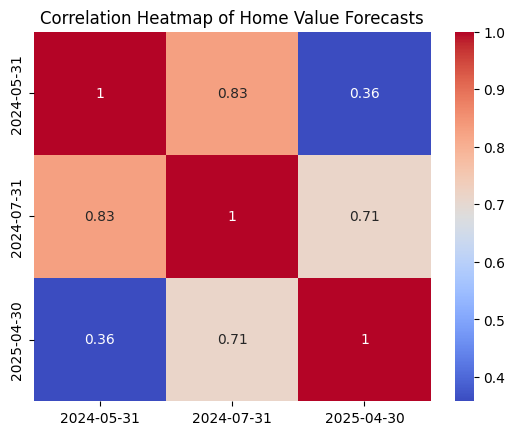

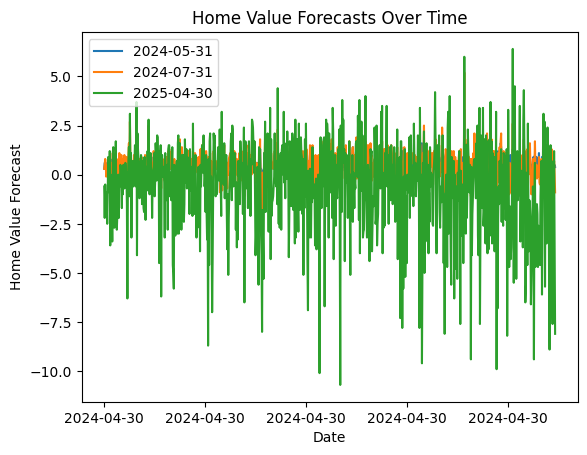

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = '/content/HOME VALUES FORECASTS.csv'
df = pd.read_csv(file_path)
df = df.dropna(subset=['2025-04-30'])

print(df.describe())

correlation_matrix = df[['2024-05-31', '2024-07-31', '2025-04-30']].corr()
print(correlation_matrix)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Home Value Forecasts')
plt.show()

df.set_index('BaseDate')[['2024-05-31', '2024-07-31', '2025-04-30']].plot()
plt.title('Home Value Forecasts Over Time')
plt.xlabel('Date')
plt.ylabel('Home Value Forecast')
plt.show()


## Model Training

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


file_path = '/content/HOME VALUES FORECASTS.csv'
df = pd.read_csv(file_path)

df = df.dropna(subset=['2025-04-30'])

features = ['2024-05-31', '2024-07-31']
target = '2025-04-30'
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 2.133410811456073
R-squared: 0.6680636791346228


**Mean Squared Error (MSE):**

The MSE of 2.133 indicates that the model's predictions have an average squared error of approximately 2.133. This low value suggests that the model's predictions are fairly accurate on the given test set.
**R-squared (R²):**

The R² value of 0.668 means that the model explains about 66.8% of the variance in the 2025-04-30 home value forecasts based on the 2024-05-31 and 2024-07-31 forecasts. This suggests that the model has a decent fit and is able to capture a significant portion of the variability in home prices.